<a href="https://colab.research.google.com/github/AzadMehedi/Feature-Engineering/blob/main/One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ওয়ান হট এনকোডার হোল একটি জনপ্রিয় এনকডার যার মাধ্যমে ক্যাটেগরিক্যাল ভ্যারিয়্যাবলকে আলাদা আলাদা কলামে কনভার্ট করা যায় এবং প্রতিটি কলামে বুলিয়ান ট্রু / ফলস বা 0/1 দ্বারা তাদের উপস্থিতি প্রকাশ করা যায়। OneHotEncoderফাংশনের মাধ্যমে এই এনকোডিং করা হয়। 

`Import dependencies`

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

`load dataset`

In [37]:
url = 'https://raw.githubusercontent.com/AzadMehedi/Feature-Engineering/main/online_profit.csv'
df = pd.read_csv(url)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,NaN,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,NaN,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [38]:
# checking shape
df.shape

(50, 5)

In [39]:
# checking if there any missig values
df.isna().values.any()

True

In [40]:
# count of missing values
df.isna().values.sum()

6

In [41]:
# checking number of missing values contains by columns
df.isna().sum()

Marketing Spend    2
Administration     0
Transport          0
Area               3
Profit             1
dtype: int64

In [42]:
# filling missing values by forward fill method
df['Marketing Spend'] = df['Marketing Spend'].fillna(method='ffill')
df['Area'] = df['Area'].fillna(method='ffill')
df['Profit'] = df['Profit'].fillna(method='ffill')

In [43]:
# checking after treatment of missing values
df.isna().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [44]:
# randomly checking dataset
df.sample(10)

,Marketing Spend,Administration,Transport,Area,Profit
4,142107.34,91391.77,366168.42,Rangpur,166187.94
34,46426.07,157693.92,210797.67,Ctg,96712.80
48,542.05,51743.15,0.00,Dhaka,35673.41
49,0.00,116983.80,45173.06,Ctg,14681.40
6,134615.46,147198.87,127716.82,Ctg,156122.51
41,27892.92,84710.77,164470.71,Rangpur,77798.83
27,72107.60,127864.55,353183.81,Dhaka,105008.31
10,101913.08,110594.11,229160.95,Rangpur,146121.95
9,123334.88,108679.17,304981.62,Ctg,149759.96
45,1000.23,124153.04,1903.93,Dhaka,64926.08


# `One Hot Encoding`
- using get_dummies function

In [45]:
# creating separate column for unique values of Area column and removing their first parts of the name
dummy = pd.get_dummies(df['Area'], drop_first=True)


In [46]:
# dropping Area column
df1 = df.drop('Area', axis=1)

In [50]:
# concate dummy columns to the main dataset
df = pd.concat([df1, dummy], axis=1)

In [51]:
df.head(10)

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,114523.61,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0
6,134615.46,147198.87,127716.82,156122.51,0,0
7,134615.46,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [52]:
# checking shape
df.shape

(50, 6)

In [53]:
x = df.drop('Profit', axis=1)
x.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,1,0
1,114523.61,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,1,0
4,142107.34,91391.77,366168.42,0,1


In [56]:
x.shape

(50, 5)

In [59]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [58]:
y.shape

(50,)

`Visualization`

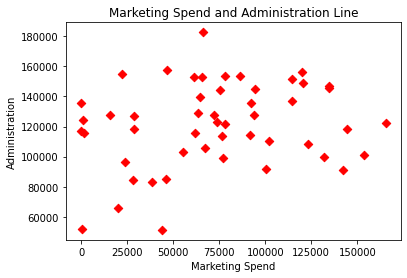

In [62]:
plt.title('Marketing Spend and Administration Line')
plt.xlabel('Marketing Spend')
plt.ylabel('Administration')
plt.scatter(df['Marketing Spend'], df['Administration'], marker='D', color='red')
plt.show()

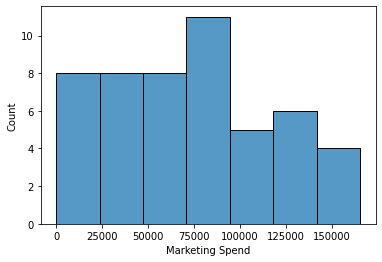

In [66]:
sns.histplot(df['Marketing Spend'])
plt.show()

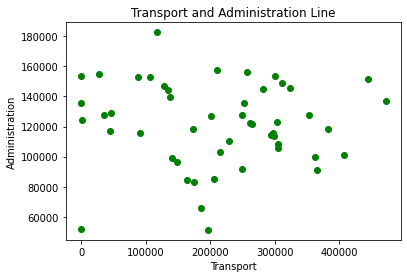

In [68]:
plt.scatter(df['Transport'], df['Administration'], marker='o', color='green')
plt.title("Transport and Administration Line")
plt.xlabel("Transport")
plt.ylabel("Administration")
plt.show()

<Axes: xlabel='Administration', ylabel='Count'>

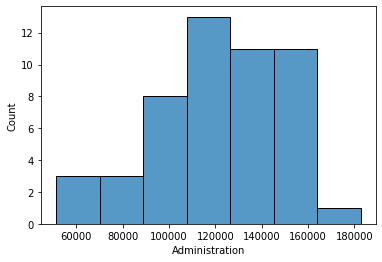

In [69]:
sns.histplot(df['Administration'])

<Axes: xlabel='Transport', ylabel='Count'>

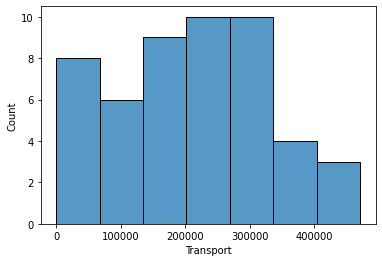

In [70]:
sns.histplot(df['Transport'])

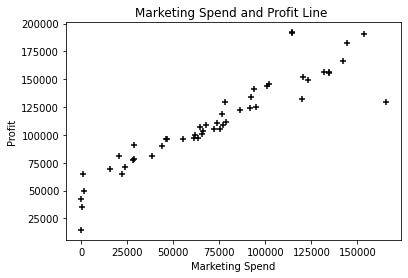

In [72]:
plt.scatter(df['Marketing Spend'], df['Profit'], marker ='+', color='black')
plt.title('Marketing Spend and Profit Line ')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

<Axes: xlabel='Profit', ylabel='Count'>

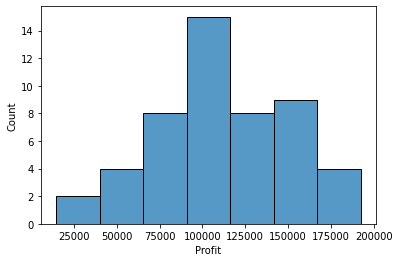

In [74]:
sns.histplot(df['Profit'])

## `Spliting Data`

In [75]:
from sklearn.model_selection import train_test_split


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 5)
(10, 5)
(40,)
(10,)


## `Using Linear Regression`

In [78]:
from sklearn.linear_model import LinearRegression


In [79]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [81]:
print('Accuracy score is: ')
lr.score(x_test, y_test)

Accuracy score is: 


0.9061632354722773

In [83]:
lr.coef_

array([ 6.05934016e-01,  8.05828938e-02,  1.14896947e-01, -3.31840056e+03,
       -6.62041311e+03])

In [85]:
lr.intercept_

35985.01174507257

In [87]:
predictions = lr.predict(x_test)